In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

In [3]:
# For outliners detection
from sklearn import preprocessing, svm

In [4]:
# For stationarity test and decomposition
import statsmodels.tsa.api as smt
import statsmodels.api as sm

In [5]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name

In [6]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

## Read Data: SP500

In [7]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [8]:
conn = engine.connect()

In [10]:
query = '''
select * from SP500
'''

remote_SP500 = pd.read_sql(query, conn)
remote_SP500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469,1478,1438,1455,1455,931800000
1,2000-01-04,1455,1455,1397,1399,1399,1009000000
2,2000-01-05,1399,1413,1378,1402,1402,1085500000
3,2000-01-06,1402,1412,1392,1403,1403,1092300000
4,2000-01-07,1403,1441,1401,1441,1441,1225200000


In [16]:
sp500 = remote_SP500[['Date', 'Close']]

grouped_sp500 = sp500.groupby('Date')['Close'].mean().rename('Avg Close')
grouped_sp500

Date
2000-01-03    1455
2000-01-04    1399
2000-01-05    1402
2000-01-06    1403
2000-01-07    1441
              ... 
2021-02-22    3876
2021-02-23    3881
2021-02-24    3925
2021-02-25    3829
2021-02-26    3811
Name: Avg Close, Length: 5322, dtype: int64

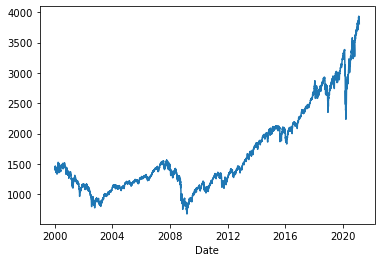

In [17]:
grouped_sp500.plot()

## Rolling Mean

In [27]:
def plot_sp(grouped_sp500, plot_ma=True, plot_intervals=True, window=30, figsize=(15,5)):    
    rolling_mean = grouped_sp500.rolling(window=window).mean()    
    rolling_std = grouped_sp500.rolling(window=window).std()
    plt.figure(figsize=figsize)    
    plt.title(grouped_sp500.name)    
    plt.plot(grouped_sp500[window:], label='Actual values', color="black")    
    
    if plot_ma:        
        plt.plot(rolling_mean, 'g', label='MA'+str(window), color="red")     
        
        if plot_intervals:
            lower_bound = rolling_mean - (1.96 * rolling_std)
            upper_bound = rolling_mean + (1.96 * rolling_std)
   
        plt.fill_between(x=grouped_sp500.index, y1=lower_bound, y2=upper_bound,
                    color='lightskyblue', alpha=0.4)
   
        plt.legend(loc='best')
        plt.grid(True)
        plt.show()

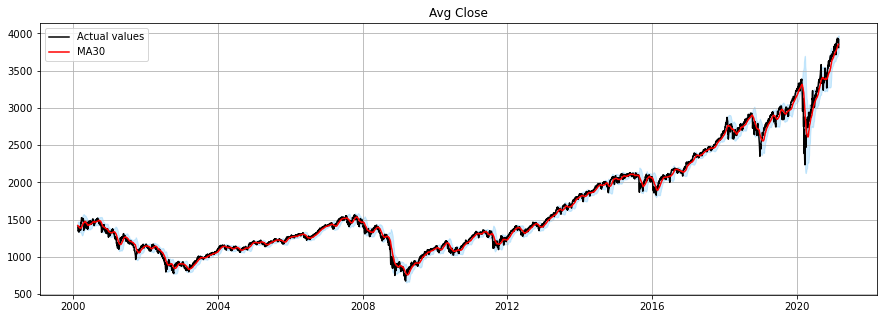

In [28]:
plot_sp(grouped_sp500, window=30)

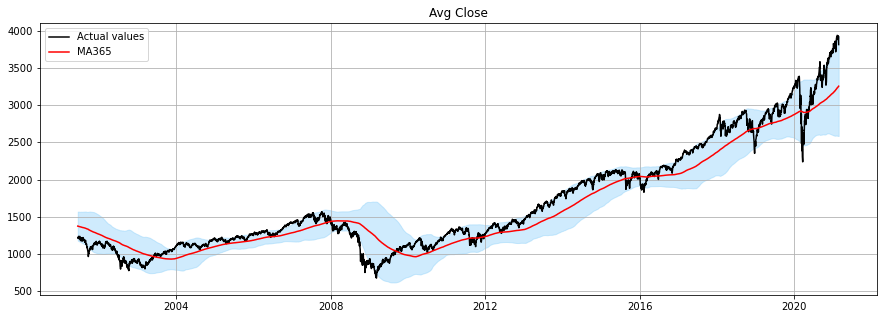

In [29]:
plot_sp(grouped_sp500, window=365)

## Outliner Detection

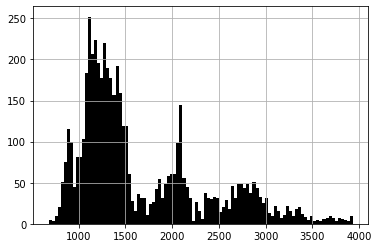

In [30]:
grouped_sp500.hist(color='black', bins=100)

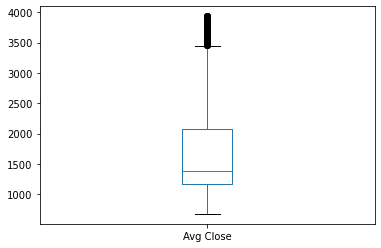

In [31]:
grouped_sp500.plot.box()